<a href="https://colab.research.google.com/github/tannghia1234/tannghia1234/blob/main/ML08/exercise_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TABLE DATA

In [ ]:
!gdown --id 1fB9P1Ha1ofQiYWU9wkLAxDZTbtp3Gfqz


/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1fB9P1Ha1ofQiYWU9wkLAxDZTbtp3Gfqz
To: /content/Auto_MPG_data.csv
100% 15.4k/15.4k [00:00<00:00, 40.4MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#torch.manual_seed(42)

In [ ]:
dataset = pd.read_csv("/content/Auto_MPG_data.csv")
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
val_dataset = dataset.drop(train_dataset.index)

In [ ]:
print(dataset.columns)

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Europe', 'Japan', 'USA'],
      dtype='object')


In [ ]:
x_train = train_dataset.drop(columns = ['MPG'])
x_test = val_dataset.drop(columns = ['MPG'])

y_train = train_dataset[['MPG']]
y_test = val_dataset[['MPG']]

x_train = torch.tensor(x_train.values,dtype = torch.float32)
x_test = torch.tensor(x_test.values,dtype = torch.float32)
y_train = torch.tensor(y_train.values,dtype = torch.float32)
y_test = torch.tensor(y_test.values,dtype = torch.float32)


In [ ]:
x_mean = x_train.mean(axis = 0)
x_std = x_train.std(axis = 0)

x_train = (x_train - x_mean)/x_std
x_test = (x_test - x_mean)/x_std

In [ ]:
class customer(Dataset):
  def __init__(self,x,y):
    self.x = x
    self.y = y

  def __len__(self):
    return len(self.y)

  def __getitem__(self,idx):
    return self.x[idx], self.y[idx]


In [ ]:
train_dataset = customer(x_train,y_train)
test_dataset = customer(x_test,y_test)

train_loader = DataLoader(train_dataset,batch_size = 32, shuffle = True)
test_loader = DataLoader(train_dataset,batch_size = 32)



In [ ]:
for i,o in train_loader:
  print(type(i))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [ ]:
def r_squared(y_true, y_pred):
    """
    Compute R^2 score.
    """

    y_true = torch.Tensor(y_true)
    y_pred = torch.Tensor(y_pred)
    mean_true = torch.mean(y_true)
    ss_tot = torch.sum((y_true - mean_true) ** 2)
    ss_res = torch.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

In [ ]:
def evaluation(model,criterion,test_loader):
  model.eval()
  losses = 0
  y_true = []
  y_pred = []
  with torch.no_grad():
    for i,(input,output) in enumerate(test_loader,0):
      input,output = input.to(device),output.to(device)

      y_hat = model(input)
      loss = criterion(y_hat,output)
      losses += loss.item()
      y_true.extend(output.tolist())
      y_pred.extend(y_hat.tolist())

  return losses/len(test_loader), r_squared(y_true,y_pred)

In [ ]:

model1 = torch.nn.Sequential(
    torch.nn.Linear(9,64),
    torch.nn.ReLU(),
    torch.nn.Linear(64,64),
    torch.nn.ReLU(),
    torch.nn.Linear(64,1)
)

model1 = model1.to(device)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model1.parameters(), lr = 0.003)





epoch_max = 100
loss_train = []
res_train = []
res_test = []
losses_test = []
for epoch in range(epoch_max):
  model1 = model1.train()
  y_true = []
  y_pred = []
  losses = 0
  for input, output in train_loader:
    input,output = input.to(device), output.to(device)

    optimizer.zero_grad()

    y_hat = model1(input)
    loss = criterion(y_hat,output)
    loss.backward()
    optimizer.step()
    y_true.extend(output.tolist())
    y_pred.extend(y_hat.tolist())
    losses += loss.item()

  r_train = r_squared(y_true,y_pred)
  res_train.append(r_train)
  loss_train.append(losses/len(train_loader))
  loss_test,r_test = evaluation(model1,criterion,test_loader)
  res_test.append(r_test)
  losses_test.append(loss_test)
  print(f'epoch [{epoch+1}/{epoch_max}]')











epoch [1/100]
epoch [2/100]
epoch [3/100]
epoch [4/100]
epoch [5/100]
epoch [6/100]
epoch [7/100]
epoch [8/100]
epoch [9/100]
epoch [10/100]
epoch [11/100]
epoch [12/100]
epoch [13/100]
epoch [14/100]
epoch [15/100]
epoch [16/100]
epoch [17/100]
epoch [18/100]
epoch [19/100]
epoch [20/100]
epoch [21/100]
epoch [22/100]
epoch [23/100]
epoch [24/100]
epoch [25/100]
epoch [26/100]
epoch [27/100]
epoch [28/100]
epoch [29/100]
epoch [30/100]
epoch [31/100]
epoch [32/100]
epoch [33/100]
epoch [34/100]
epoch [35/100]
epoch [36/100]
epoch [37/100]
epoch [38/100]
epoch [39/100]
epoch [40/100]
epoch [41/100]
epoch [42/100]
epoch [43/100]
epoch [44/100]
epoch [45/100]
epoch [46/100]
epoch [47/100]
epoch [48/100]
epoch [49/100]
epoch [50/100]
epoch [51/100]
epoch [52/100]
epoch [53/100]
epoch [54/100]
epoch [55/100]
epoch [56/100]
epoch [57/100]
epoch [58/100]
epoch [59/100]
epoch [60/100]
epoch [61/100]
epoch [62/100]
epoch [63/100]
epoch [64/100]
epoch [65/100]
epoch [66/100]
epoch [67/100]
epoc

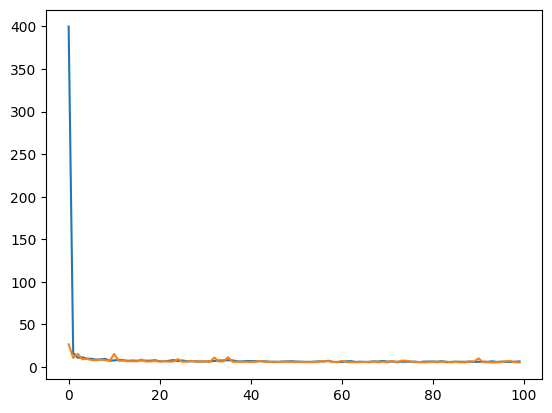

In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss_train)
plt.plot(losses_test)

CLASSIFICATION

In [ ]:
!gdown --id 1bUBWn2Osoc6Y1XskxF_o0JgWVFw0iV_6

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1bUBWn2Osoc6Y1XskxF_o0JgWVFw0iV_6
To: /content/NonLinear_data.npy
100% 5.57k/5.57k [00:00<00:00, 26.0MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
data_path = "/content/NonLinear_data.npy"
data = np.load(data_path, allow_pickle=True).item()
x = data['X']
y = data['labels']

x = torch.tensor(x,dtype=torch.float32)
y = torch.tensor(y,dtype=torch.long)


In [ ]:
class customDataset(Dataset):
  def __init__(self,x,y):
    self.x = x
    self.y = y
  def __len__(self):
    return len(self.y)
  def __getitem__(self,idx):
    return self.x[idx],self.y[idx]


In [ ]:

dataloader = customDataset(x,y)
train_loader = DataLoader(dataloader, batch_size = 32, shuffle = True)

In [ ]:

'''model = torch.nn.Sequential(
    torch.nn.Linear(2,128),
    torch.nn.ReLU(),
    torch.nn.Linear(128,3)

)'''

class MLP(nn.Module):
  def __init__(self,input_dims,hidden_dims,output_dims):
    super(MLP,self).__init__()
    self.linear1 = torch.nn.Linear(input_dims,hidden_dims)
    self.output = torch.nn.Linear(hidden_dims,output_dims)
    self.relu = torch.nn.ReLU()

  def forward(self,x):
    x = self.linear1(x)
    x = self.relu(x)
    out = self.output(x)
    return out.squeeze(1)


model = MLP(2,128,3)
model = model.to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

train_loss = []
train_acc = []
epoch_max = 500
for epoch in range(epoch_max):
  model.train()
  losses = 0
  total = 0
  acc = 0
  for i,(input,output) in enumerate(train_loader,0):
    input,output = input.to(device),output.to(device)
    optimizer.zero_grad()
    predict = model(input)
    loss = criterion(predict,output)
    loss.backward()
    optimizer.step()

    losses += loss.item()

    total += len(output)
    index = torch.argmax(predict,1)
    acc += (index == output).sum().item()

  train_loss.append(losses/len(train_loader))
  train_acc.append(100*acc/total)
  print(f'epoch [{epoch+1}/{epoch_max}] - train loss = {losses/len(train_loader)} - acc loss = {100*acc/total}')






epoch [1/500] - train loss = 0.9982673764228821 - acc loss = 48.333333333333336
epoch [2/500] - train loss = 0.8743214070796966 - acc loss = 54.333333333333336
epoch [3/500] - train loss = 0.8226730167865753 - acc loss = 56.333333333333336
epoch [4/500] - train loss = 0.7848042190074921 - acc loss = 54.0
epoch [5/500] - train loss = 0.7730636239051819 - acc loss = 55.0
epoch [6/500] - train loss = 0.7638461709022522 - acc loss = 58.333333333333336
epoch [7/500] - train loss = 0.747284722328186 - acc loss = 56.333333333333336
epoch [8/500] - train loss = 0.7275196611881256 - acc loss = 55.333333333333336
epoch [9/500] - train loss = 0.7444511175155639 - acc loss = 54.0
epoch [10/500] - train loss = 0.7159883141517639 - acc loss = 56.0
epoch [11/500] - train loss = 0.7220858871936798 - acc loss = 57.333333333333336
epoch [12/500] - train loss = 0.7097116947174072 - acc loss = 56.666666666666664
epoch [13/500] - train loss = 0.7093417584896088 - acc loss = 55.666666666666664
epoch [14/500

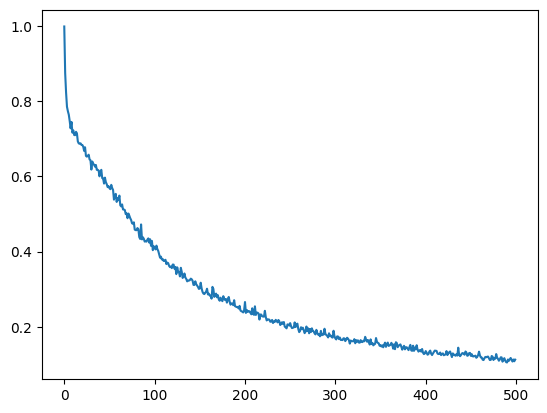

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_loss)

In [ ]:
!gdown --id 1bFx6uiQV-GUGwL3PwYRIYdmRCF9hS2bP

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1bFx6uiQV-GUGwL3PwYRIYdmRCF9hS2bP
To: /content/FER-2013.zip
100% 63.3M/63.3M [00:01<00:00, 62.0MB/s]


In [ ]:
!unzip -q "/content/FER-2013.zip"

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import Resize
from torchvision.io import read_image
import os
from torchvision.transforms import transforms
file_test = "/content/test"
file_train = "/content/train"







In [ ]:
class imageDataset(Dataset):
  def __init__(self,file_dir,norm,w_scale,h_scale):
    self.w_scale = w_scale
    self.h_scale = h_scale
    self.file_dir = file_dir
    self.classes = os.listdir(file_dir)

    self.file_img = [(os.path.join(cls,img),cls) for cls in self.classes
                                    for img in os.listdir(os.path.join(file_dir,cls))]
    self.cls_to_idx = {cls:idx for idx,cls in enumerate(self.classes)}
    #self.idx_to_cls = {idx:cls for cls,idx in self.cls_to_idx}
    self.norm = norm

  def __len__(self):
    return len(self.file_img)
  def __getitem__(self,idx):
    img_path,label = self.file_img[idx]
    img = cv2.resize(cv2.imread(os.path.join(self.file_dir,img_path),0),(self.w_scale,self.h_scale))
    img = torch.from_numpy(img).type(torch.float32)
    label1 = self.cls_to_idx[label]
    if self.norm:
      img = (img/127.5) - 1
    return img, label1



In [ ]:
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(180, 180)),
    transforms.Grayscale(),
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0
])

In [ ]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=file_train, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=file_test,
                                 transform=data_transform)

print(train_data[0])

(tensor([[[0.1961, 0.1961, 0.1843,  ..., 0.3804, 0.3373, 0.3373],
         [0.1961, 0.1961, 0.1843,  ..., 0.3804, 0.3373, 0.3373],
         [0.2000, 0.2000, 0.1882,  ..., 0.3804, 0.3412, 0.3412],
         ...,
         [0.4118, 0.4118, 0.4118,  ..., 0.3608, 0.3294, 0.3294],
         [0.4078, 0.4078, 0.4078,  ..., 0.3608, 0.3255, 0.3255],
         [0.4078, 0.4078, 0.4078,  ..., 0.3608, 0.3255, 0.3255]]]), 0)


In [ ]:
train_dataset = imageDataset(file_train,True,180,180)
#train_loader = DataLoader(train_data, batch_size=256, shuffle=True)

test_dataset = imageDataset(file_test,True,180,180)
#test_loader = DataLoader(test_data, batch_size=256, shuffle=False)

In [ ]:
print(train_dataset[0])

(tensor([[-1.0000, -1.0000, -1.0000,  ..., -0.5216, -0.6157, -0.6157],
        [-1.0000, -1.0000, -1.0000,  ..., -0.5216, -0.6157, -0.6157],
        [-0.9922, -0.9922, -0.9922,  ..., -0.5216, -0.6235, -0.6235],
        ...,
        [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]]), 0)


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
def evaluation(model,criterion,test_loader):
  model.eval()
  losses = 0
  total = 0
  acc = 0
  with torch.no_grad():
    for i,(img,label) in enumerate(test_loader):
      img,label = img.to(device),label.to(device)
      predict = model(img)
      loss = criterion(predict,label)

      losses += loss.item()

      total += len(label)
      idx = torch.argmax(predict)
      acc += (idx==label).sum().item()

  return losses/len(test_loader), 100*acc/total




In [ ]:

model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(180*180,7),
)
model = model.to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.006)

epoch_max = 100
train_loss = []
train_acc = []
test_loss = []
test_acc = []


for epoch in range(epoch_max):
  model.train()
  losses = 0
  total = 0
  acc = 0
  for i,(img,label) in enumerate(train_loader):
    img,label = img.to(device),label.to(device)
    optimizer.zero_grad()
    predict = model(img)

    loss = criterion(predict,label)
    loss.backward()
    optimizer.step()

    losses += loss.item()

    total += len(label)
    idx = torch.argmax(predict)
    acc += (idx==label).sum().item()

  train_loss.append(losses/len(train_loader))
  train_acc.append(100*acc/total)

  test,acc_test = evaluation(model,criterion,test_loader)

  test_loss.append(test)
  test_acc.append(acc_test)
  print(f'epoch [{epoch+1}/{epoch_max}]')








epoch [1/100]
epoch [2/100]
epoch [3/100]
epoch [4/100]
epoch [5/100]
epoch [6/100]
epoch [7/100]
epoch [8/100]
epoch [9/100]
epoch [10/100]
epoch [11/100]
epoch [12/100]
epoch [13/100]
epoch [14/100]
epoch [15/100]
epoch [16/100]
epoch [17/100]
epoch [18/100]
epoch [19/100]
epoch [20/100]
epoch [21/100]
epoch [22/100]
epoch [23/100]
epoch [24/100]
epoch [25/100]
epoch [26/100]
epoch [27/100]
epoch [28/100]
epoch [29/100]
epoch [30/100]
epoch [31/100]
epoch [32/100]
epoch [33/100]
epoch [34/100]
epoch [35/100]
epoch [36/100]
epoch [37/100]
epoch [38/100]
epoch [39/100]
epoch [40/100]
epoch [41/100]
epoch [42/100]
epoch [43/100]
epoch [44/100]
epoch [45/100]
epoch [46/100]
epoch [47/100]
epoch [48/100]
epoch [49/100]
epoch [50/100]
epoch [51/100]
epoch [52/100]
epoch [53/100]
epoch [54/100]
epoch [55/100]
epoch [56/100]
epoch [57/100]
epoch [58/100]
epoch [59/100]
epoch [60/100]
epoch [61/100]
epoch [62/100]
epoch [63/100]
epoch [64/100]
epoch [65/100]
epoch [66/100]
epoch [67/100]
epoc

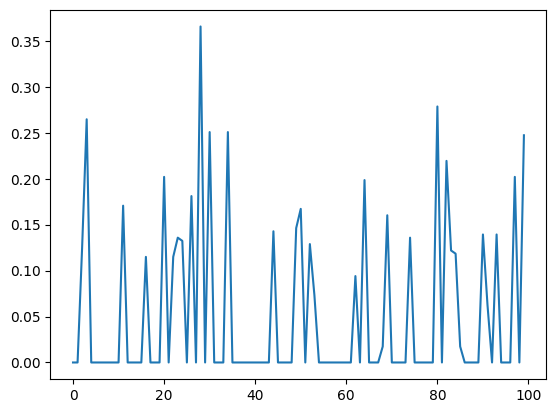

In [ ]:
plt.plot(train_acc)